# Libraries Needed

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
import ast
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
import math
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Check and see the correlation for numerical variables

In [2]:
df_forest = pd.read_csv('anime_details_cleaned+genres.csv')
df_forest = df_forest.dropna()
df_forest['mean'] = df_forest['mean'].round(0) # you will round to make a class

df_forest = df_forest.dropna()

df_forest['mean'] = df_forest['mean'].round(0) # you will round to make a class

# Pairplot of the numerical features

C:\Users\leeju\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


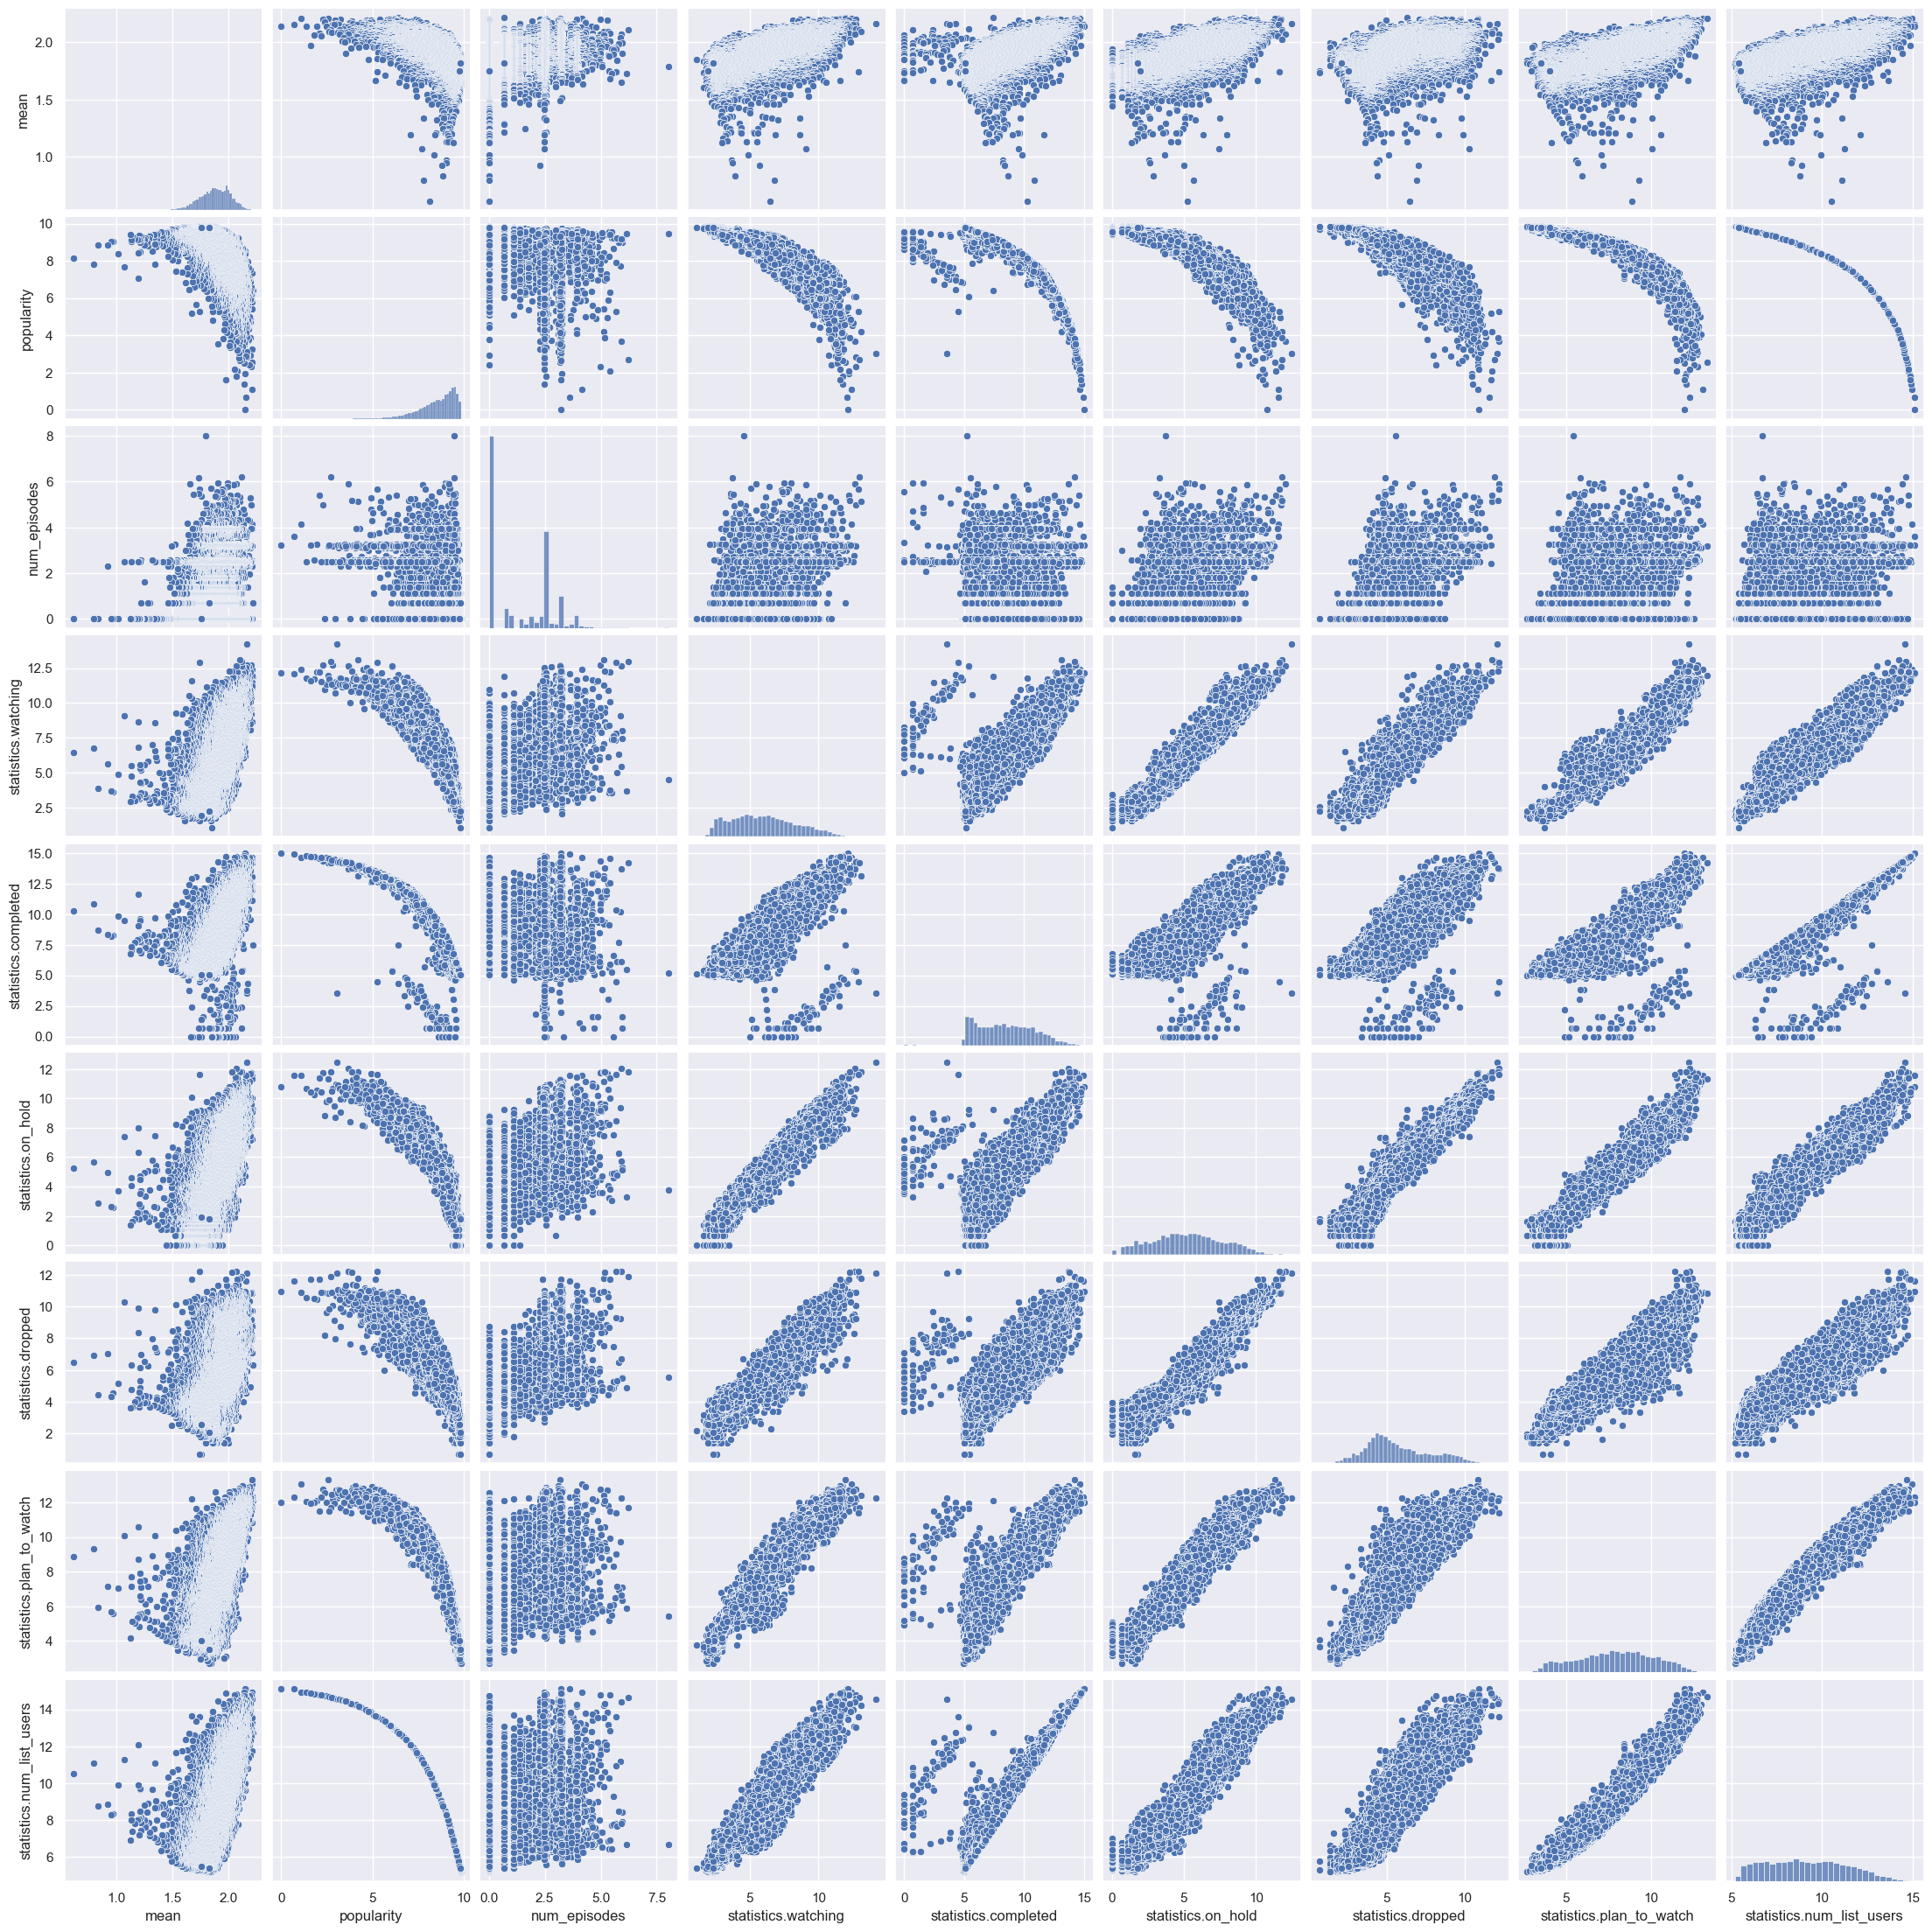

In [3]:
df_new = pd.read_csv('anime_details_cleaned.csv')
pd.set_option('display.max_columns', None)
df_drop = df_new.drop(['nsfw','rating','num_list_users','id','rank','title','id','num_scoring_users','media_type','status','genres','source','studios','start_season.year','start_season.season'], axis=1)
sb.pairplot(data = np.log(df_drop))
plt.show()

# Analysis

* All the numerical features seems to have a slight correlation with the mean

# Random Forest method to pick best features

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
genress = ['Parody', 'Action', 'Comedy',
       'Organized Crime', 'Horror', 'Historical', 'Combat Sports',
       'Video Game', 'Otaku Culture', 'Gag Humor', 'Vampire', 'Reverse Harem',
       'Girls Love', 'Kids', 'Shoujo', 'Gourmet', 'Showbiz', 'Military',
       'Space', 'Music', 'Detective', 'Mythology', 'Romance', 'Martial Arts',
       'Romantic Subtext', 'Harem', 'Iyashikei', 'Time Travel', 'Ecchi',
       'Suspense', 'Idols (Male)', 'Pets', 'Workplace', 'Anthropomorphic',
       'Medical', 'Gore', 'Supernatural', 'Survival', 'Team Sports',
       'Crossdressing', 'Drama', 'Isekai', 'Racing', 'Childcare',
       'Mystery', 'Boys Love', 'Visual Arts', 'Mecha', 'Strategy Game',
       'Adult Cast', 'Idols (Female)', 'Fantasy', 'Super Power',
       'Mahou Shoujo', 'Sci-Fi', 'Psychological', 'Delinquents', 'Samurai',
       'School', 'CGDCT', 'Slice of Life', 'Reincarnation', 'Educational',
       'Avant Garde', 'Shounen', 'Seinen', 'Adventure', 'Josei',
       'Award Winning', 'Performing Arts', 'Love Polygon', 'Magical Sex Shift',
       'High Stakes Game', 'Sports']

## One hot encoding used for random forest

In [6]:
# For the watch rate

df_forest['watch_rate'] = (df_forest['statistics.completed'] + df_forest['statistics.watching']) / (df_forest['statistics.completed'] + df_forest['statistics.dropped'] + df_forest['statistics.on_hold'] + df_forest['statistics.watching'])
df_forest.drop(['statistics.watching','statistics.completed','statistics.on_hold','statistics.dropped'], axis=1, inplace=True)

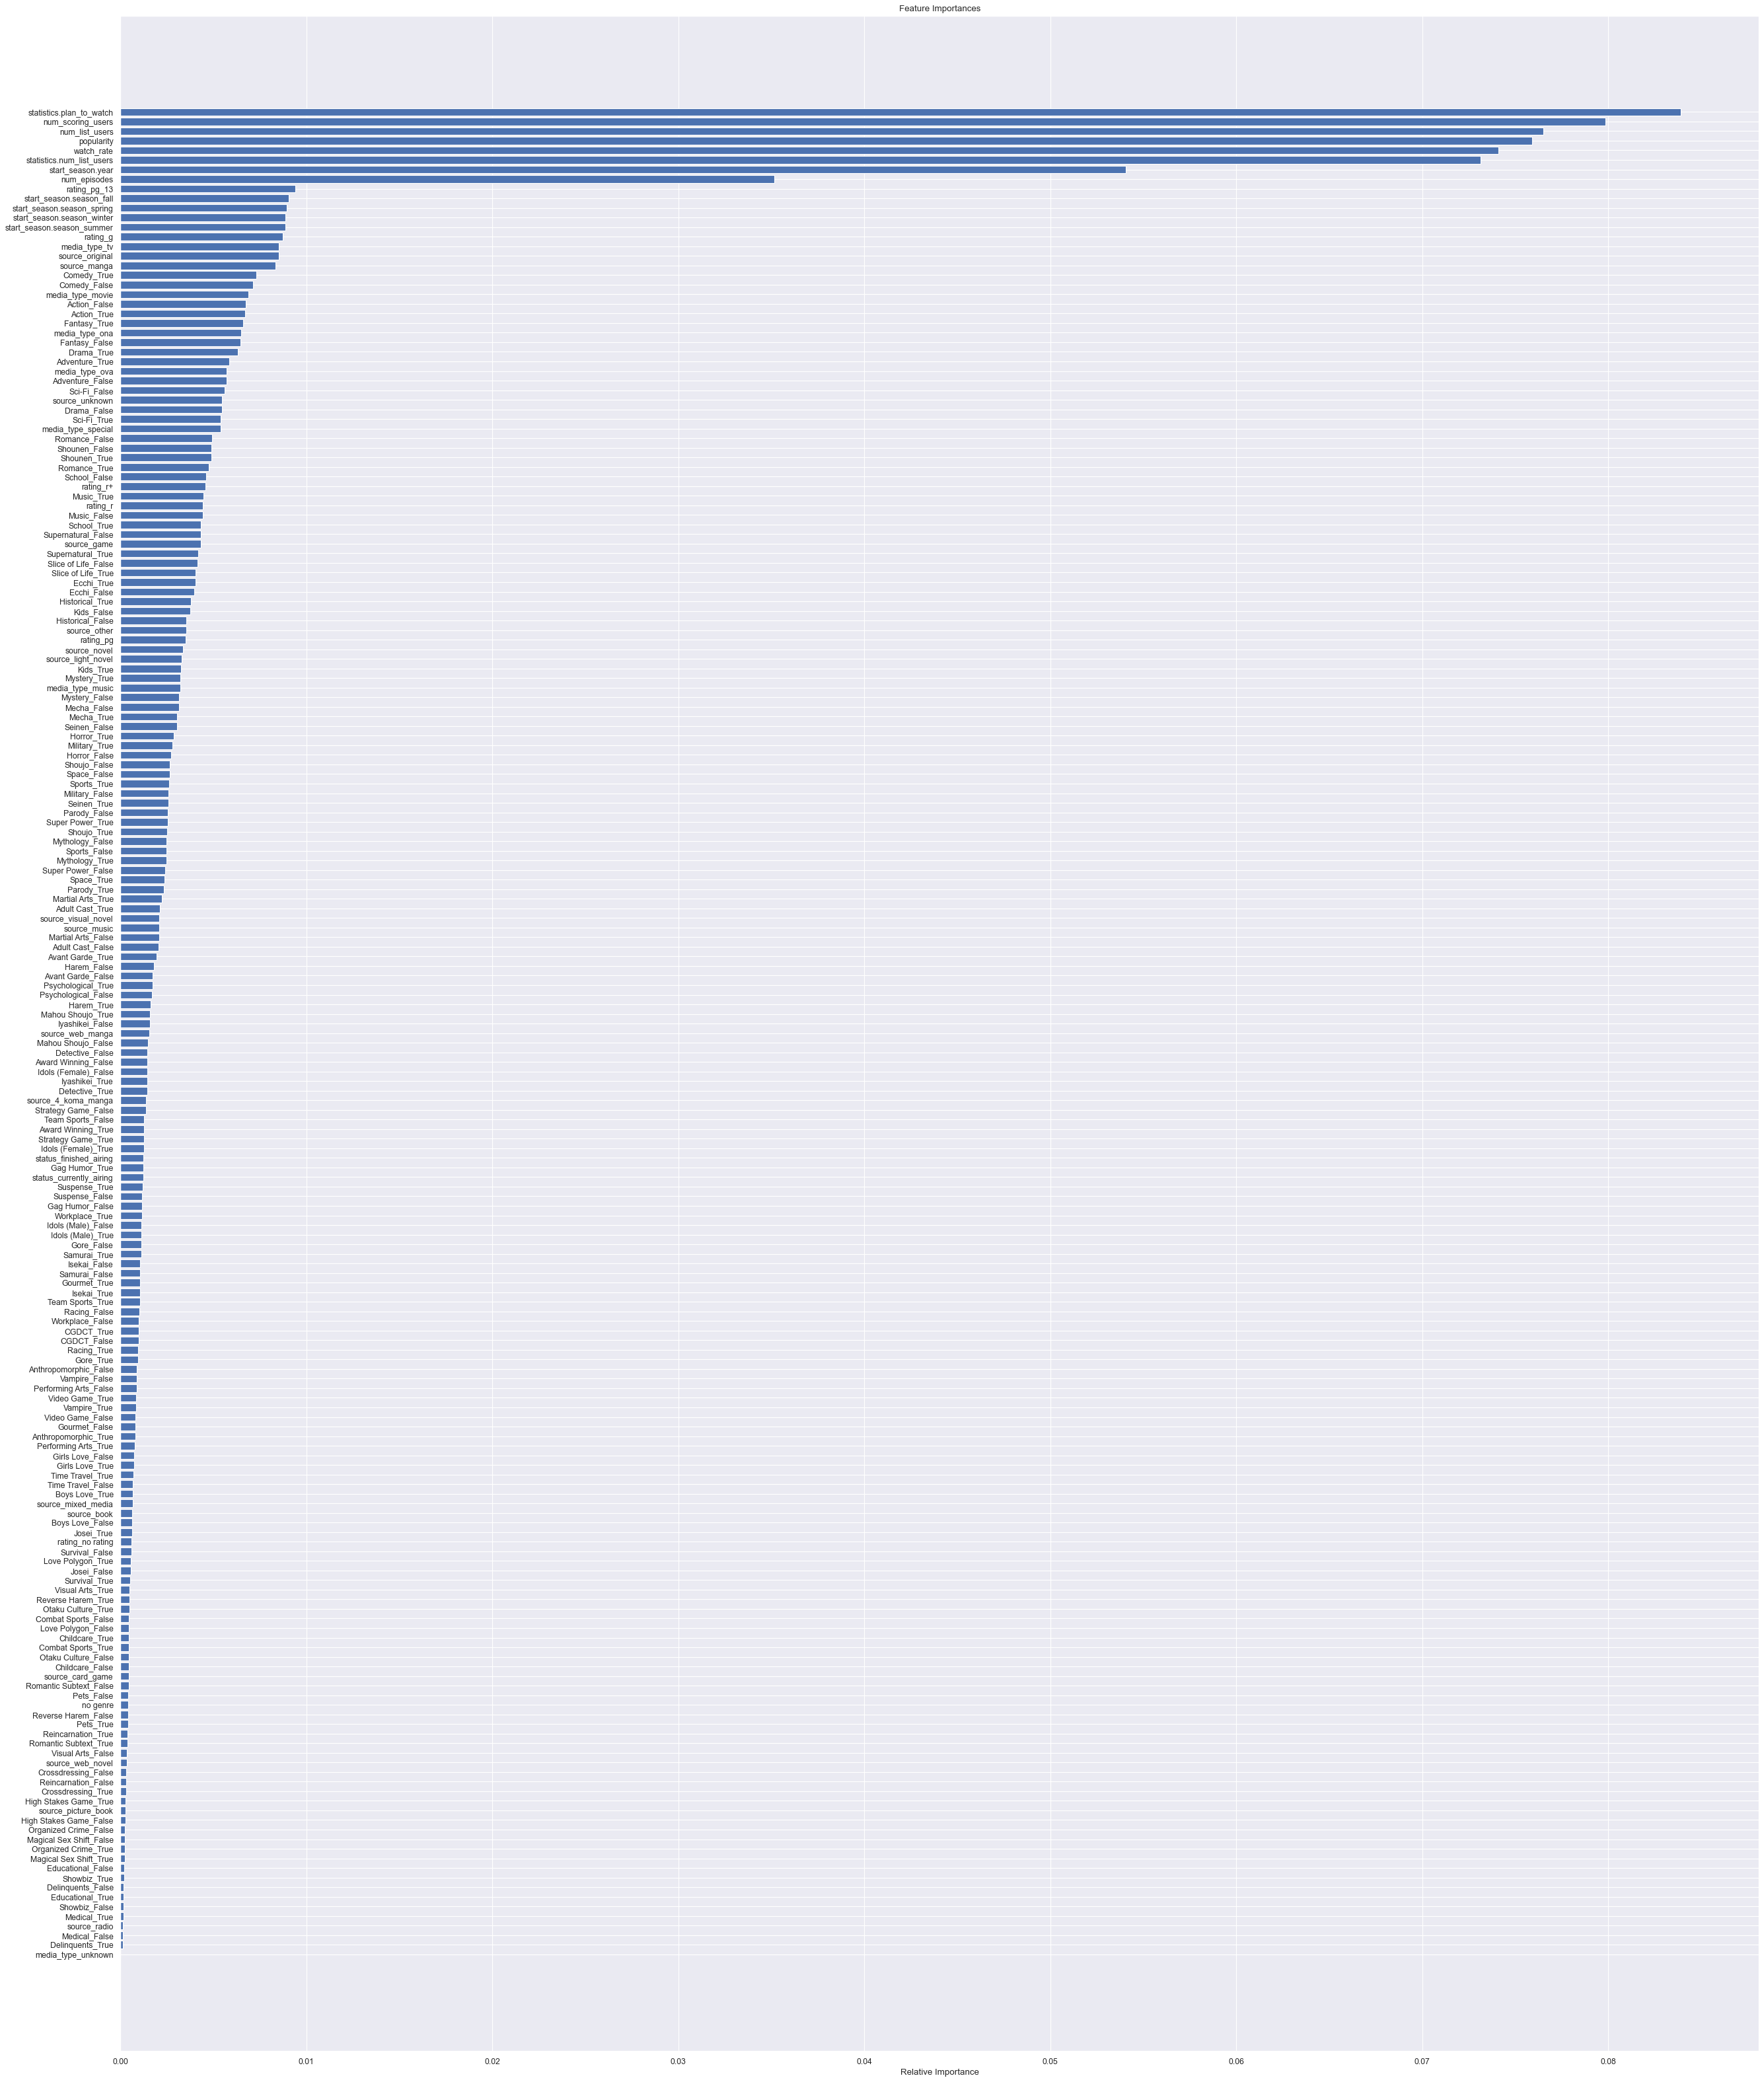

In [7]:
df_OHE_col= pd.get_dummies(data = df_forest,columns=['media_type', 'status','source','rating','start_season.season']+genress)

mean_score = df_forest['mean']

rest_predictor = df_OHE_col.drop(columns = ['rank','id','title','studios','mean'])

# To train test split 


X_train, X_test, y_train, y_test = train_test_split(rest_predictor, mean_score, test_size = 0.25)

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

from matplotlib.pyplot import figure

figure(figsize=(40, 50), dpi=80)


features = rest_predictor.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Ranking the variable/features

* The higher, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

* GINI importance used to rank the features stated below

## The top 10 Features to use for my linear regression

* Populairty
* Statistics number list user
* Number of list user
* Number of Scoring users
* Watch rate
* Statistics plan to watch
* Start season year
* Rating PG 13
* Start season Fall
* Number of episodes


# Prediction with random forest A ML

In [8]:
from sklearn.metrics import accuracy_score
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6753525444512569

# Analysis

* With all the features after one hot encoding. Using Random Forest to predict the mean score. 
* From the classification report, there is an accuracy of 0.678, which is moderately high.
* Random forest can be said to be good machine learning model to predict the mean score.

## Function to for actual vs predicted values

In [9]:
def plot_actual_vs_pred(y, y_pred, title=None):
    plot_df = pd.concat([pd.DataFrame(y, columns=['mean']), pd.DataFrame(y_pred, columns=['mean_predicted'])], axis=1, join='inner')
    plot_df.sort_values(by=['mean'], inplace=True)
    plot_df.reset_index(inplace=True, drop=True)
    ax = sb.lineplot(data=plot_df)
    if title:
        ax.set_title(title)

# Variables we are using to predict

* Populairty
* Statistics number list user
* Number of list user
* Number of Scoring users
* Watch rate
* Statistics plan to watch
* Start season year
* Rating PG 13
* Start season Fall
* Number of episodes


Intercept of Regression 	: b =  4.59079884836836

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4636928009565281
Mean Squared Error (MSE) 	: 0.4578730141333266

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.442470642255121
Mean Squared Error (MSE) 	: 0.4777798720589073



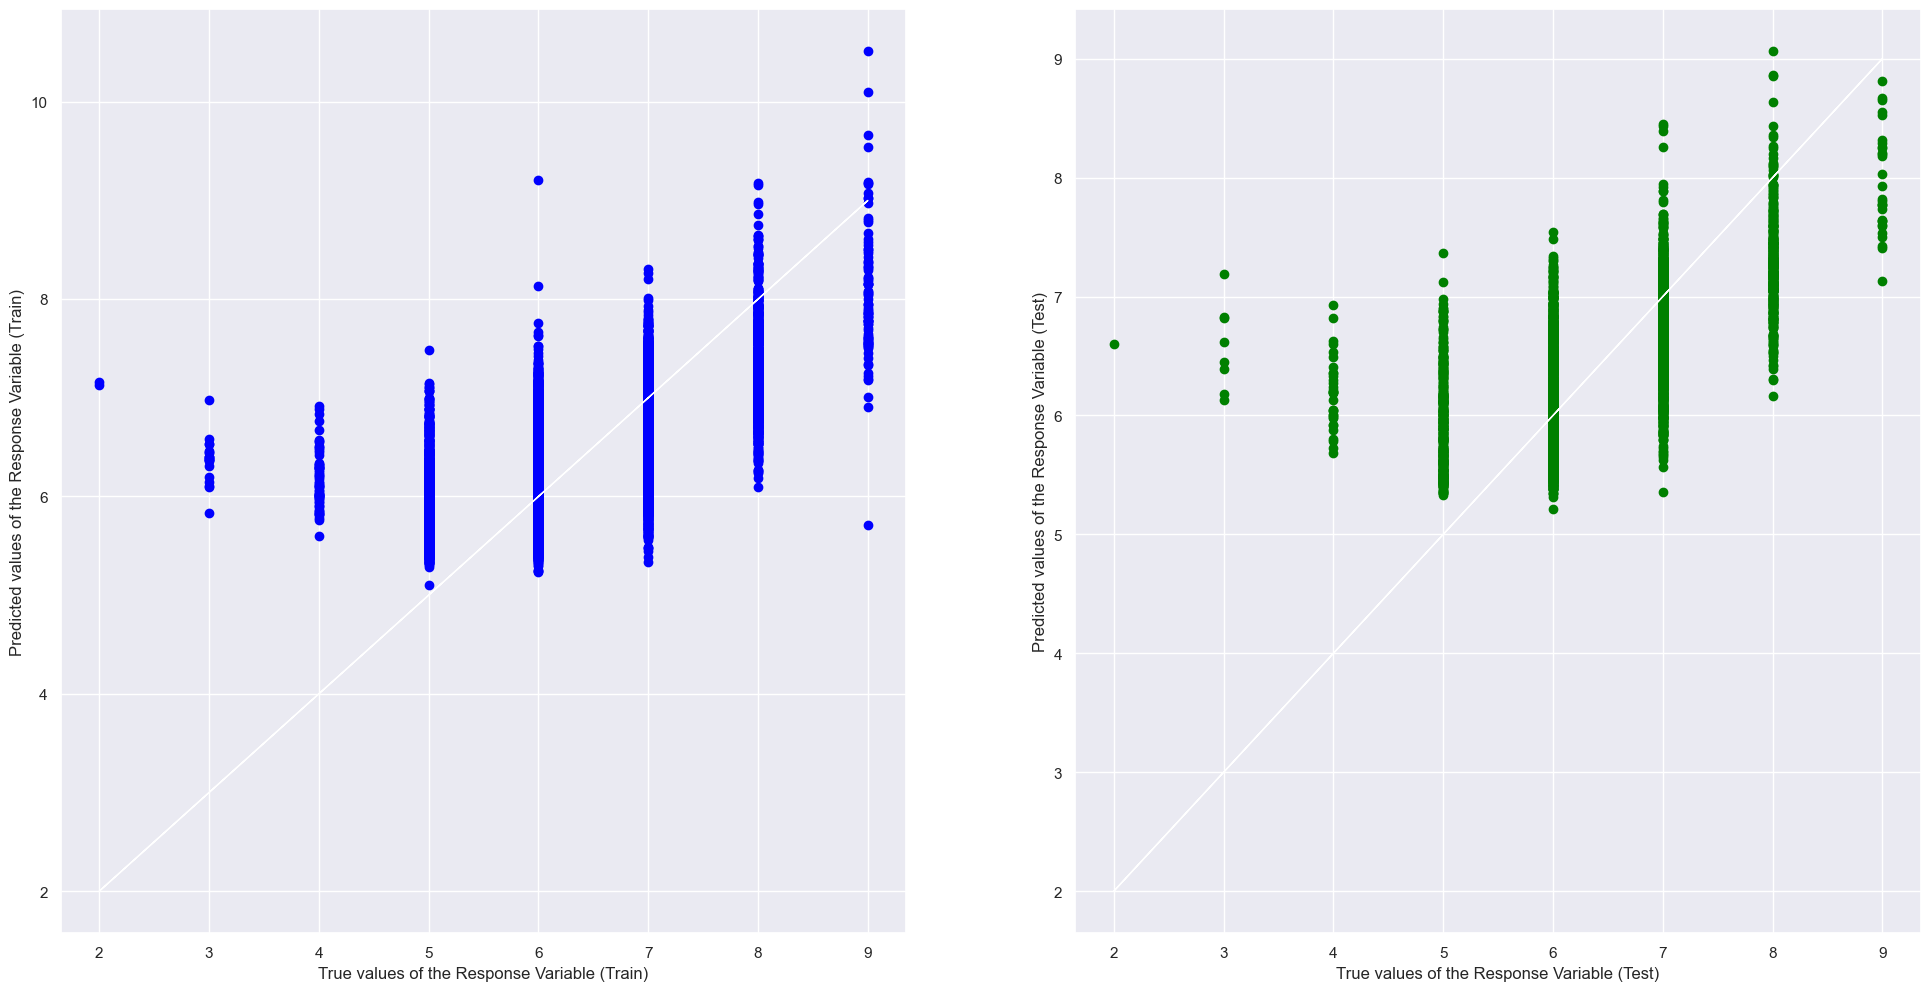

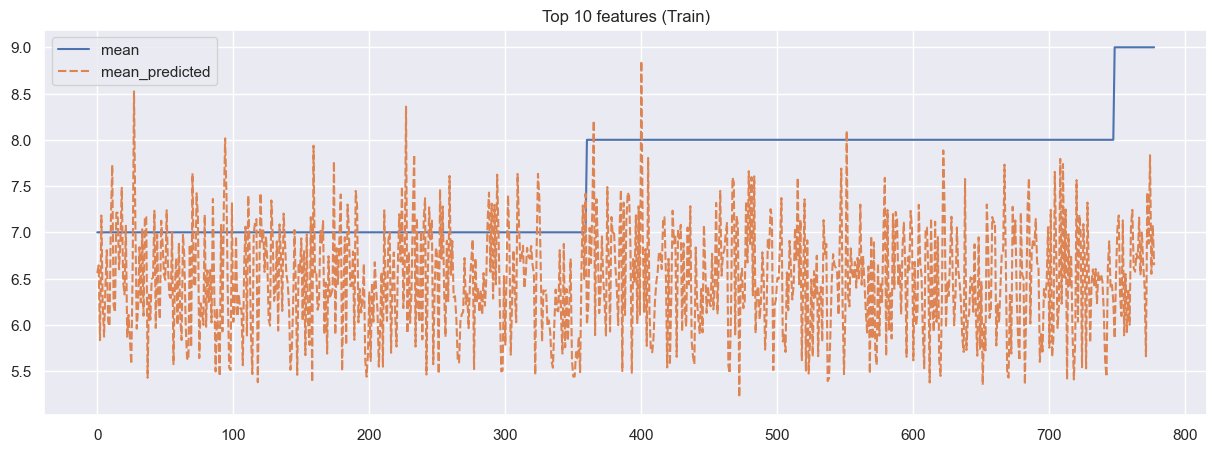

In [10]:
df_OHE_col= pd.get_dummies(data = df_forest,columns=['media_type', 'status','source','rating','start_season.season']+genress)
mean_score = df_OHE_col['mean']
rest_predictor = df_OHE_col[['popularity','statistics.num_list_users','statistics.plan_to_watch','num_scoring_users'
                            ,'num_list_users','watch_rate','start_season.year','num_episodes','rating_pg_13','num_episodes','start_season.season_fall']]


X_train, X_test, y_train, y_test = train_test_split(rest_predictor, mean_score, test_size = 0.25)

linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
#print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

fg = plt.figure(figsize=(15, 5))
plot_actual_vs_pred(y_test, y_test_pred, title='Top 10 features (Train)')
plt.show()

# Analysis

* When using linear regression with the top 10 features from the random forest, the MSE is moderately high.
* The explained variance is also is moderately as it has a value below 0.5.
* This might suggest that the model is not very fitting of the data.

# Linear Regression with all the variables/features, Multi-variate linear regression

### Drop the non essential columns. Not needed for prediction


In [11]:
df_complete_or_drop = pd.read_csv('anime_details_cleaned+genres.csv')
df_complete_or_drop = df_complete_or_drop.drop(['num_list_users','id','rank','title','popularity','num_scoring_users','start_season.year', 'start_season.season', 'statistics.num_list_users', 'statistics.plan_to_watch', 'statistics.watching', 'statistics.completed', 'statistics.on_hold', 'statistics.dropped'], axis=1)

df_complete_or_drop['studio_name'] = df_complete_or_drop['studios'].astype('str')

df_complete_or_drop['studio_name'] = df_complete_or_drop['studios'].apply(lambda x: ast.literal_eval(str(x)))

def studio_name(row):
    print(row['studio_name'][0]['name'])
    name = row['studio_name'][0]['name']
    return name

df_complete_or_drop['studio_only'] = df_complete_or_drop['studio_name'].apply(lambda x:
                                                x[0].get('name', '')
                                                if len(x) > 0 else 'no studio')


df_complete_or_drop=df_complete_or_drop.drop(['studios','studio_name'],axis=1)

df_complete_or_drop = df_complete_or_drop.dropna()
df_complete_or_drop_no_studios = df_complete_or_drop[df_complete_or_drop['studio_only'] != 'no studio'] # filter 
df_ml = df_complete_or_drop_no_studios



Intercept of Regression 	: b =  5.94915621666342

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5071638634450594
Mean Squared Error (MSE) 	: 0.33516676285821134

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.38991458343646557
Mean Squared Error (MSE) 	: 0.4058165470404717



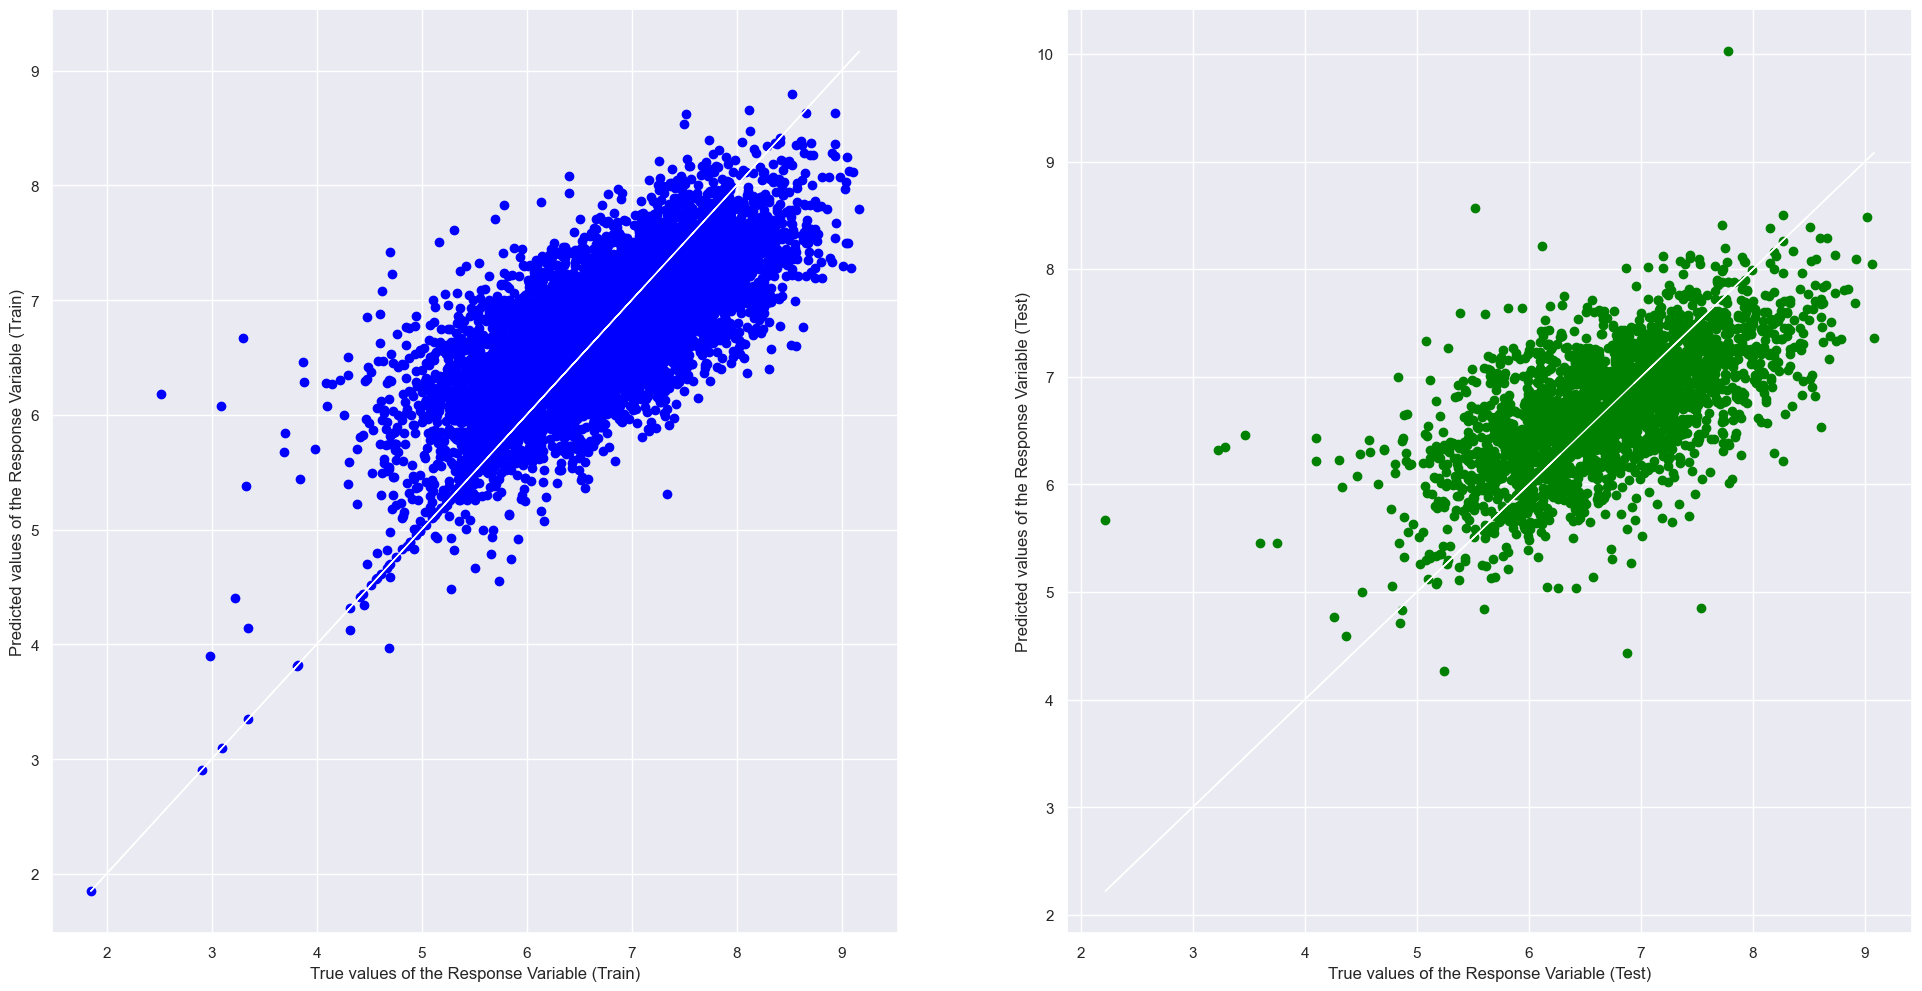

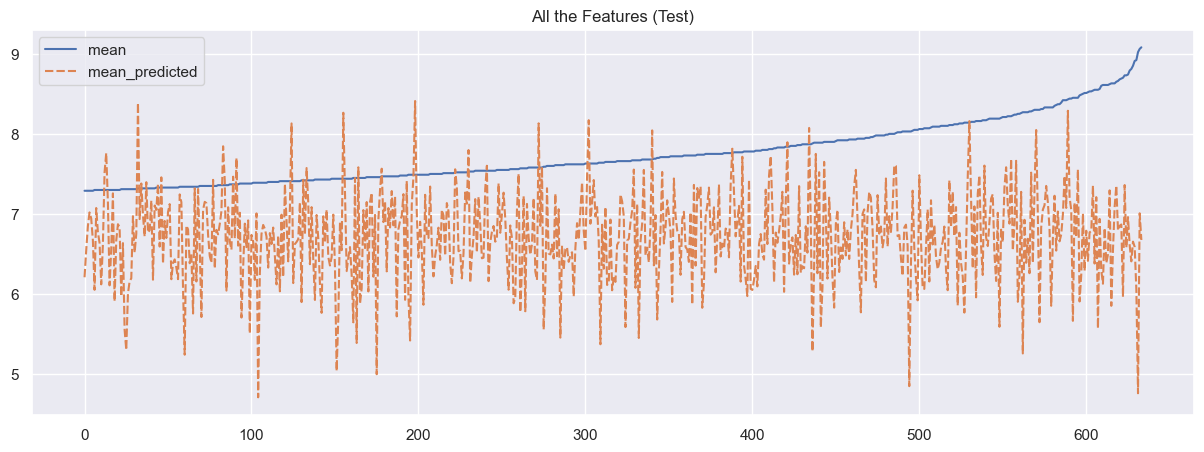

In [16]:
df_ml
df_all = df_ml
df_OHE_all= pd.get_dummies(data = df_all)
mean_score = df_OHE_all['mean']
rest_predictor = df_OHE_all.iloc[:,1:]
X_train, X_test, y_train, y_test = train_test_split(rest_predictor, mean_score, test_size = 0.25)
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
#print('Coefficients of Regression \t: a = ', linreg.coef_)
print()


# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)

axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()
fg = plt.figure(figsize=(15, 5))
plot_actual_vs_pred(y_test, y_test_pred, title='All the Features (Test)')
plt.show()

# Analysis

* The train dataset MSE and R^2 value is not the best. With a highly negative and positive value respectively.

# Comparing with top 10 features and all the features

* When using top 10 features, we can see that the test's MSE and R^2 is much better compared to the one above.
* Even though it linear regression might not be a good model to fit these data, however fitting with the top 10 feature drastiscally improves the MSE and R^2 value.
* The linear regression with all the features might be bad due over fitting as there are a lot of features.

# Ridge Regression with top 10 features 

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4580791449674849
Mean Squared Error (MSE) 	: 0.46555733481351536

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4590407858180773
Mean Squared Error (MSE) 	: 0.4551671061261718



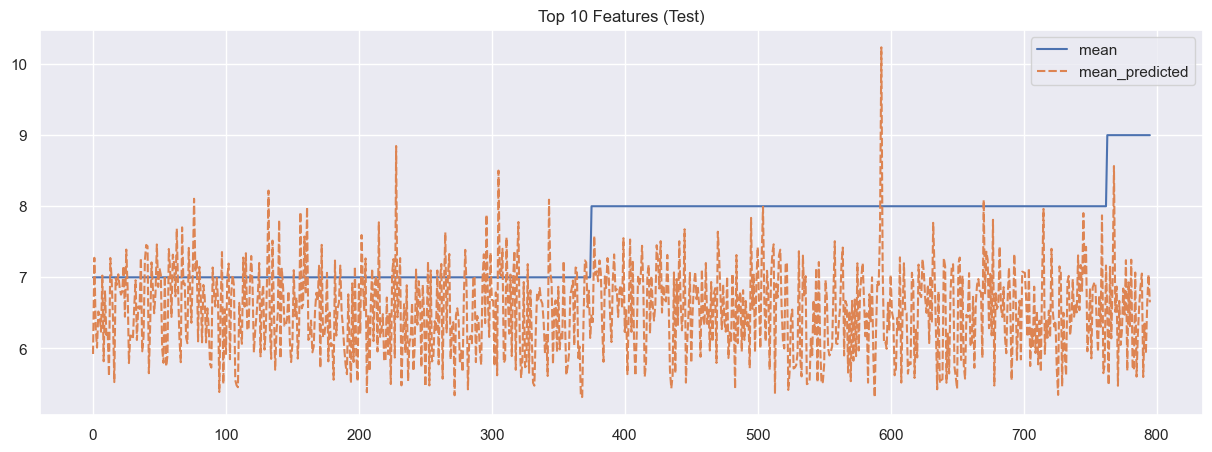

In [13]:
from sklearn.linear_model import Ridge
df_OHE_col= pd.get_dummies(data = df_forest,columns=['media_type', 'status','source','rating','start_season.season']+genress)
mean_score = df_OHE_col[['mean']]
rest_predictor = df_OHE_col[['popularity','statistics.num_list_users','statistics.plan_to_watch','num_scoring_users'
                            ,'num_list_users','watch_rate','start_season.year','num_episodes','rating_pg_13','num_episodes','start_season.season_fall']]



X_train, X_test, y_train, y_test = train_test_split(rest_predictor, mean_score, test_size = 0.25)


clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
Ridge()
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", clf.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", clf.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_pred))
print()

fg = plt.figure(figsize=(15, 5))
plot_actual_vs_pred(y_test, y_pred, title='Top 10 Features (Test)')
plt.show()

# Analysis

* Train Dataset: The Ridge Regression model has an R-squared value of 0.46 on the train dataset, indicating that 46% of the variability in the dependent variable can be explained by the independent variables. The MSE is 0.47, which means that the average squared difference between the predicted and actual values is 0.47.


* Test Dataset: The Ridge Regression model has an R-squared value of 0.44 on the test dataset, indicating that 46% of the variability in the dependent variable can be explained by the independent variables. The MSE is slightly higher than the MSE on the train dataset, at 0.46.


* Compared to the Linear Regression model, the Ridge Regression model has a slightly higher R-squared value on the train dataset, but the same R-squared value on the test dataset. The MSE on the test dataset is also very similar to that of the Linear Regression model.

# Polynomial Regression

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5398856972397299
Mean Squared Error (MSE) 	: 0.3949726141178238

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5145862214772292
Mean Squared Error (MSE) 	: 0.4093972896990084



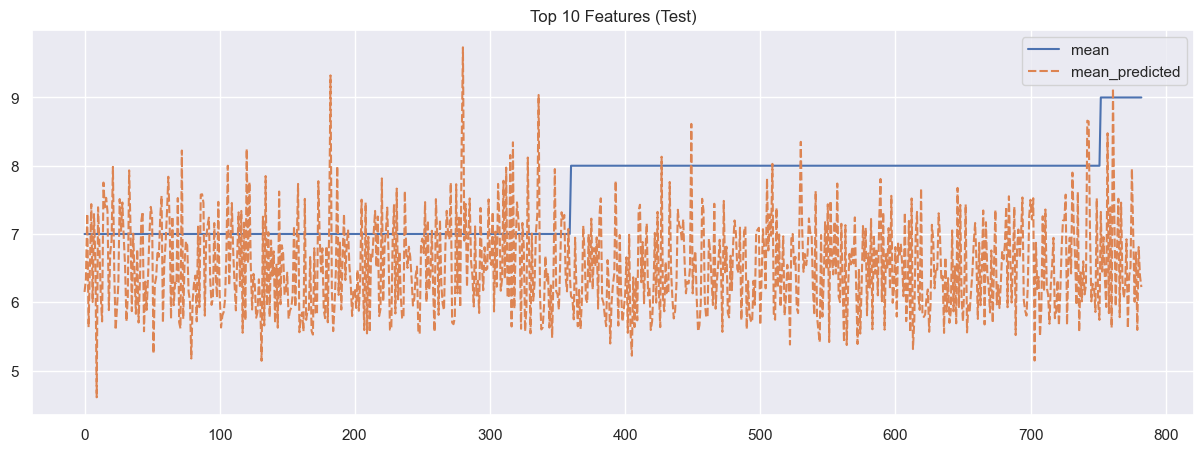

In [28]:
from sklearn.preprocessing import PolynomialFeatures  
poly_regs= PolynomialFeatures(degree= 2)  


df_OHE_col= pd.get_dummies(data = df_forest,columns=['media_type', 'status','source','rating','start_season.season']+genress)
mean_score = df_OHE_col[['mean']]
rest_predictor = df_OHE_col[['popularity','statistics.num_list_users','statistics.plan_to_watch','num_scoring_users'
                            ,'num_list_users','watch_rate','start_season.year','num_episodes','rating_pg_13','num_episodes','start_season.season_fall']]


X_train, X_test, y_train, y_test = train_test_split(rest_predictor, mean_score, test_size = 0.25)


x_poly_train= poly_regs.fit_transform(X_train)  
x_poly_test = poly_regs.fit_transform(X_test) 
lin_reg_2 =LinearRegression()  
lin_reg_2.fit(x_poly_train, y_train)  


y_train_pred = lin_reg_2.predict(x_poly_train)
y_test_pred = lin_reg_2.predict(x_poly_test)


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", lin_reg_2.score(x_poly_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()


# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", lin_reg_2.score(x_poly_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

fg = plt.figure(figsize=(15, 5))
plot_actual_vs_pred(y_test, y_test_pred, title='Top 10 Features (Test)')
plt.show()

# Analysis

* The explained variance is the higher out of the other 2 models. But it is still below 0.5

* The mean squared value is still relatively high

# Conclusion - Regression

1. Linear Regression: This model has an R-squared value of 0.44 on the test dataset, indicating that 44% of the variability in the dependent variable can be explained by the independent variables. The MSE is 0.48, which means that the average squared difference between the predicted and actual values is 0.48.


2. Ridge Regression: This model has an R-squared value of 0.46 on the test dataset, which is slightly higher than that of the Linear Regression model. The MSE is 0.46, which is also lower than that of the Linear Regression model. Ridge Regression is a regularization technique that adds a penalty term to the cost function to prevent overfitting, and this technique appears to have helped improve the performance of the model.


3. Polynomial Regression: This model has the highest R-squared value of 0.51 on the test dataset, indicating that 51% of the variability in the dependent variable can be explained by the independent variables. The MSE is 0.41, which is the lowest among the three models. Polynomial Regression allows for the modeling of non-linear relationships between the independent and dependent variables, and it appears to have captured some non-linearities in the data that the other models did not.


Overall, based on the provided metrics, it appears that the Polynomial Regression model performs the best in terms of both R-squared and MSE on the test dataset.
